In [4]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [5]:
samples_new = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

samples_old = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [7]:
fileset_new = utilities.make_fileset(samples_new, "official")
fileset_old = utilities.make_fileset(samples_old, "private")

events_new, events_old = {}, {}

for i in tqdm(samples_new):
    fname = fileset_new[i][0]
    print(fname)
    events_new[i] = NanoEventsFactory.from_root(
        fname,
        treepath='ffNtuplizer/ffNtuple',
        schemaclass=ffschema.FFSchema,
    ).events()

    
for i in tqdm(samples_old):
    fname = fileset_old[i][0]
    print(fname)
    events_old[i] = NanoEventsFactory.from_root(
        fname,
        treepath='ffNtuplizer/ffNtuple',
        schemaclass=ffschema.FFSchema,
    ).events()

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-0p08_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-0p80_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-8p00_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-40p0_off.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/official/SIDM_XXTo2ATo4Mu_mXX-500_mA-5_ctau-80p0_off.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_v6.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/ffNuple/Private/ffNtuple_SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_v6.root


In [4]:
print(events_new["4mu_500GeV_5GeV_0p08mm"].fields)

['run', 'event', 'lumi', 'fixedGridRho', 'puInteractionNum', 'trueInteractionNum', 'weight', 'weightProduct', 'HLT_DoubleL2Mu23NoVtx_2Cha', 'HLT_DoubleL2Mu23NoVtx_2Cha_NoL2Matched', 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed', 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched', 'HLT_DoubleL2Mu25NoVtx_2Cha', 'HLT_DoubleL2Mu25NoVtx_2Cha_NoL2Matched', 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed', 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_NoL2Matched', 'HLT_DoubleL2Mu25NoVtx_2Cha_Eta2p4', 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_Eta2p4', 'HLT_Mu38NoFiltersNoVtxDisplaced_Photon38_CaloIdL', 'HLT_Mu43NoFiltersNoVtx_Photon43_CaloIdL', 'tomatchfilter_result', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2Cha', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaNoL2Matched', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeed', 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeedNoL2Matched', 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaEta2p4', 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaCosmicSeedEta2p4', 'L1TOHLT_DoubleL2Mu25NoVtx_2Cha_NoL2Ma

In [ ]:
print(events_new["4mu_500GeV_5GeV_0p08mm"].gen.fields)

In [ ]:
print(events_new["4mu_500GeV_5GeV_0p08mm"].gen.vtx.fields)

In [ ]:
print(events_new["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx.fields)

In [ ]:
print(events_new["4mu_500GeV_5GeV_0p08mm"].gen.vtx)
print(events_new["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx)

In [ ]:
print(events_new["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx - events_new["4mu_500GeV_5GeV_0p08mm"].gen.vtx)

In [ ]:
print((events_new["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx - events_new["4mu_500GeV_5GeV_0p08mm"].gen.vtx).rho)

In [ ]:
print((events_new["4mu_500GeV_5GeV_0p08mm"].gen.dauvtx - events_new["4mu_500GeV_5GeV_0p08mm"].gen.vtx).p)

In [8]:
masked_gen1 = events_new["4mu_500GeV_5GeV_0p08mm"].gen[(abs(events_new["4mu_500GeV_5GeV_0p08mm"].gen.pid) == 32) & (abs(events_new["4mu_500GeV_5GeV_0p08mm"].gen.daupid) == 13)]

In [ ]:
print((masked_gen1.dauvtx - masked_gen1.vtx).p)

In [9]:
import vector

In [35]:
def mask_gen(sample):
    
    masked_gen = events_new["{0}".format(sample)].gen[(abs(events_new["{0}".format(sample)].gen.pid) == 32) & (abs(events_new["{0}".format(sample)].gen.daupid) == 13)]
    
    return masked_gen.x, masked_gen.y, masked_gen.z, masked_gen.t, masked_gen

In [36]:
def make_vec(x,y,z,t):
    
    masked_gen_vec = vector.zip({
        "px": masked_gen1.x,
        "py": masked_gen1.y,
        "pz": masked_gen1.z,
        "e": masked_gen1.t})
    
    return masked_gen_vec, masked_gen_vec.beta, masked_gen_vec.gamma, masked_gen_vec.rho

In [39]:
x1,y1,z1,t1,gen1 = mask_gen("4mu_500GeV_5GeV_0p08mm")

In [40]:
o1, b1, g1, r1 = make_vec(x1,y1,z1,t1)

In [10]:
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.optimize import differential_evolution

In [15]:
off_rho1 = ak.flatten((gen1.dauvtx - gen1.vtx).rho)
off_gamma1 = ak.flatten(masked_gen1_vec.gamma)
off_beta1 = ak.flatten(masked_gen1_vec.beta)

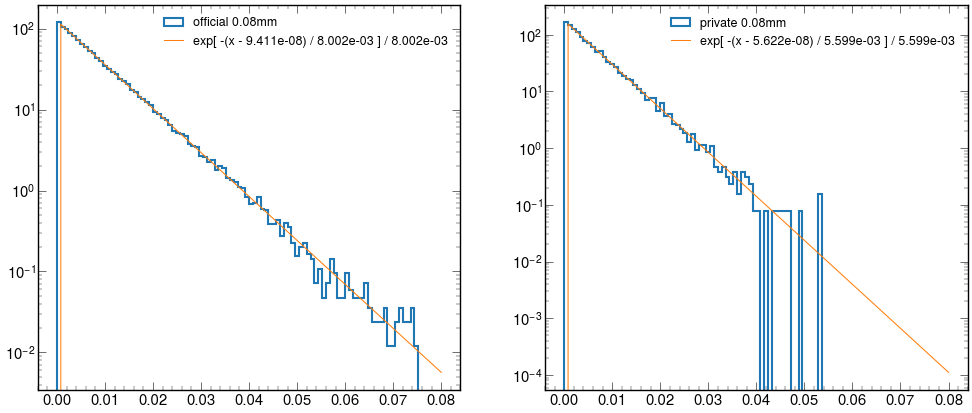

In [12]:
masked_gen1 = events_new["4mu_500GeV_5GeV_0p08mm"].gen[(abs(events_new["4mu_500GeV_5GeV_0p08mm"].gen.pid) == 32) & (abs(events_new["4mu_500GeV_5GeV_0p08mm"].gen.daupid) == 13)]
masked_gen2 = events_old["4mu_500GeV_5GeV_0p08mm"].gen[(abs(events_old["4mu_500GeV_5GeV_0p08mm"].gen.pid) == 32) & (abs(events_old["4mu_500GeV_5GeV_0p08mm"].gen.daupid) == 13)]

masked_gen1_vec = vector.zip({
        "px": masked_gen1.x,
        "py": masked_gen1.y,
        "pz": masked_gen1.z,
        "e": masked_gen1.t})

masked_gen2_vec = vector.zip({
        "px": masked_gen2.x,
        "py": masked_gen2.y,
        "pz": masked_gen2.z,
        "e": masked_gen2.t})

rho1 = ak.flatten((masked_gen1.dauvtx - masked_gen1.vtx).rho)
gamma1 = ak.flatten(masked_gen1_vec.gamma)
beta1 = ak.flatten(masked_gen1_vec.beta)

rho2 = ak.flatten((masked_gen2.dauvtx - masked_gen2.vtx).rho)
gamma2 = ak.flatten(masked_gen2_vec.gamma)
beta2 = ak.flatten(masked_gen2_vec.beta)

plt.style.use(hep.style.CMS)

fig, ax = plt.subplots(1, 2, figsize=(24,10))

plt_range = (0,.08)

P1 = stats.expon.fit(rho1/(gamma1 * beta1))
P2 = stats.expon.fit(rho2/(gamma2 * beta2))

ax[0].hist(rho1/(gamma1 * beta1), range=plt_range, linewidth=3, bins=100, histtype='step', label="official 0.08mm", density=True)
ax[0].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P1), label=fr"exp[ -(x - {P1[0]:.3e}) / {P1[1]:.3e} ] / {P1[1]:.3e}")
ax[0].set_yscale("log")
ax[0].legend(fontsize=18)

ax[1].hist(rho2/(gamma2 * beta2), range=plt_range, linewidth=3, bins=100, histtype='step', label="private 0.08mm", density=True)
ax[1].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P2), label=fr"exp[ -(x - {P2[0]:.3e}) / {P2[1]:.3e} ] / {P2[1]:.3e}")
ax[1].set_yscale("log")
ax[1].legend(fontsize=18)

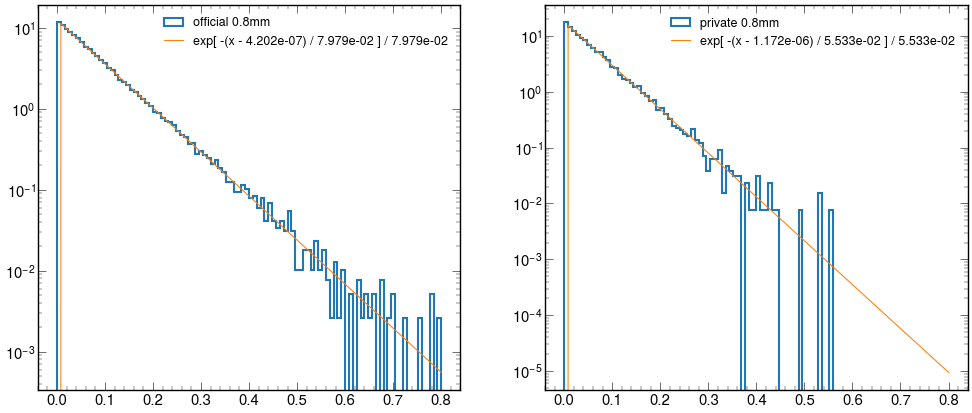

In [61]:
masked_gen1 = events_new["4mu_500GeV_5GeV_0p8mm"].gen[(abs(events_new["4mu_500GeV_5GeV_0p8mm"].gen.pid) == 32) & (abs(events_new["4mu_500GeV_5GeV_0p8mm"].gen.daupid) == 13)]
masked_gen2 = events_old["4mu_500GeV_5GeV_0p8mm"].gen[(abs(events_old["4mu_500GeV_5GeV_0p8mm"].gen.pid) == 32) & (abs(events_old["4mu_500GeV_5GeV_0p8mm"].gen.daupid) == 13)]

masked_gen1_vec = vector.zip({
        "px": masked_gen1.x,
        "py": masked_gen1.y,
        "pz": masked_gen1.z,
        "e": masked_gen1.t})

masked_gen2_vec = vector.zip({
        "px": masked_gen2.x,
        "py": masked_gen2.y,
        "pz": masked_gen2.z,
        "e": masked_gen2.t})

rho1 = ak.flatten((masked_gen1.dauvtx - masked_gen1.vtx).rho)
gamma1 = ak.flatten(masked_gen1_vec.gamma)
beta1 = ak.flatten(masked_gen1_vec.beta)

rho2 = ak.flatten((masked_gen2.dauvtx - masked_gen2.vtx).rho)
gamma2 = ak.flatten(masked_gen2_vec.gamma)
beta2 = ak.flatten(masked_gen2_vec.beta)

plt.style.use(hep.style.CMS)

fig, ax = plt.subplots(1, 2, figsize=(24,10))

plt_range = (0,.8)

P1 = stats.expon.fit(rho1/(gamma1 * beta1))
P2 = stats.expon.fit(rho2/(gamma2 * beta2))

ax[0].hist(rho1/(gamma1 * beta1), range=plt_range, linewidth=3, bins=100, histtype='step', label="official 0.8mm", density=True)
ax[0].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P1), label=fr"exp[ -(x - {P1[0]:.3e}) / {P1[1]:.3e} ] / {P1[1]:.3e}")
ax[0].set_yscale("log")
ax[0].legend(fontsize=18)

ax[1].hist(rho2/(gamma2 * beta2), range=plt_range, linewidth=3, bins=100, histtype='step', label="private 0.8mm", density=True)
ax[1].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P2), label=fr"exp[ -(x - {P2[0]:.3e}) / {P2[1]:.3e} ] / {P2[1]:.3e}")
ax[1].set_yscale("log")
ax[1].legend(fontsize=18)

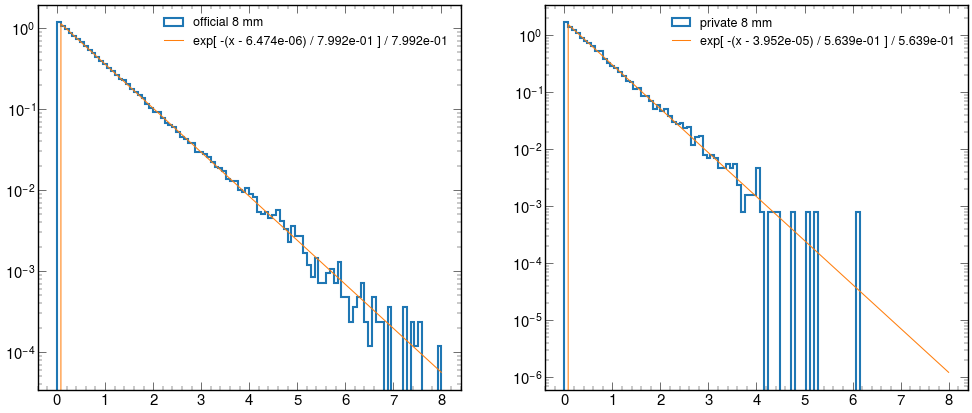

In [64]:
masked_gen1 = events_new["4mu_500GeV_5GeV_8p0mm"].gen[(abs(events_new["4mu_500GeV_5GeV_8p0mm"].gen.pid) == 32) & (abs(events_new["4mu_500GeV_5GeV_8p0mm"].gen.daupid) == 13)]
masked_gen2 = events_old["4mu_500GeV_5GeV_8p0mm"].gen[(abs(events_old["4mu_500GeV_5GeV_8p0mm"].gen.pid) == 32) & (abs(events_old["4mu_500GeV_5GeV_8p0mm"].gen.daupid) == 13)]

masked_gen1_vec = vector.zip({
        "px": masked_gen1.x,
        "py": masked_gen1.y,
        "pz": masked_gen1.z,
        "e": masked_gen1.t})

masked_gen2_vec = vector.zip({
        "px": masked_gen2.x,
        "py": masked_gen2.y,
        "pz": masked_gen2.z,
        "e": masked_gen2.t})

rho1 = ak.flatten((masked_gen1.dauvtx - masked_gen1.vtx).rho)
gamma1 = ak.flatten(masked_gen1_vec.gamma)
beta1 = ak.flatten(masked_gen1_vec.beta)

rho2 = ak.flatten((masked_gen2.dauvtx - masked_gen2.vtx).rho)
gamma2 = ak.flatten(masked_gen2_vec.gamma)
beta2 = ak.flatten(masked_gen2_vec.beta)

plt.style.use(hep.style.CMS)

fig, ax = plt.subplots(1, 2, figsize=(24,10))

plt_range = (0,8)

P1 = stats.expon.fit(rho1/(gamma1 * beta1))
P2 = stats.expon.fit(rho2/(gamma2 * beta2))

ax[0].hist(rho1/(gamma1 * beta1), range=plt_range, linewidth=3, bins=100, histtype='step', label="official 8 mm", density=True)
ax[0].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P1), label=fr"exp[ -(x - {P1[0]:.3e}) / {P1[1]:.3e} ] / {P1[1]:.3e}")
ax[0].set_yscale("log")
ax[0].legend(fontsize=18)

ax[1].hist(rho2/(gamma2 * beta2), range=plt_range, linewidth=3, bins=100, histtype='step', label="private 8 mm", density=True)
ax[1].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P2), label=fr"exp[ -(x - {P2[0]:.3e}) / {P2[1]:.3e} ] / {P2[1]:.3e}")
ax[1].set_yscale("log")
ax[1].legend(fontsize=18)

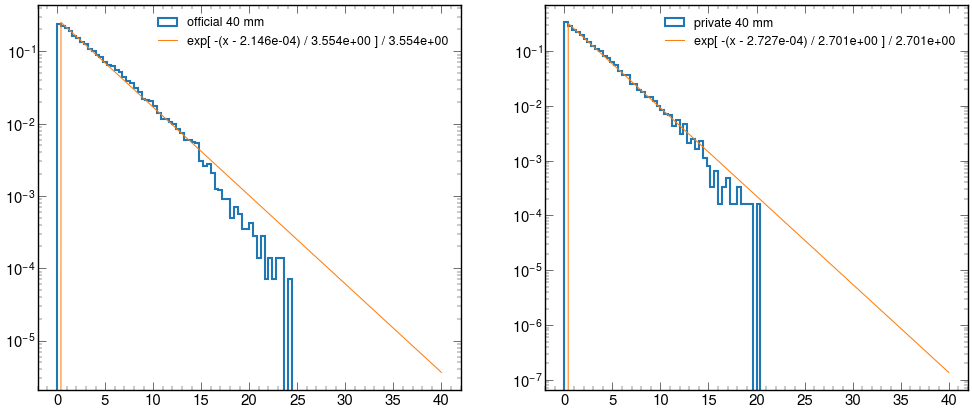

In [65]:
masked_gen1 = events_new["4mu_500GeV_5GeV_40p0mm"].gen[(abs(events_new["4mu_500GeV_5GeV_40p0mm"].gen.pid) == 32) & (abs(events_new["4mu_500GeV_5GeV_40p0mm"].gen.daupid) == 13)]
masked_gen2 = events_old["4mu_500GeV_5GeV_40p0mm"].gen[(abs(events_old["4mu_500GeV_5GeV_40p0mm"].gen.pid) == 32) & (abs(events_old["4mu_500GeV_5GeV_40p0mm"].gen.daupid) == 13)]

masked_gen1_vec = vector.zip({
        "px": masked_gen1.x,
        "py": masked_gen1.y,
        "pz": masked_gen1.z,
        "e": masked_gen1.t})

masked_gen2_vec = vector.zip({
        "px": masked_gen2.x,
        "py": masked_gen2.y,
        "pz": masked_gen2.z,
        "e": masked_gen2.t})

rho1 = ak.flatten((masked_gen1.dauvtx - masked_gen1.vtx).rho)
gamma1 = ak.flatten(masked_gen1_vec.gamma)
beta1 = ak.flatten(masked_gen1_vec.beta)

rho2 = ak.flatten((masked_gen2.dauvtx - masked_gen2.vtx).rho)
gamma2 = ak.flatten(masked_gen2_vec.gamma)
beta2 = ak.flatten(masked_gen2_vec.beta)

plt.style.use(hep.style.CMS)

fig, ax = plt.subplots(1, 2, figsize=(24,10))

plt_range = (0,40)

P1 = stats.expon.fit(rho1/(gamma1 * beta1))
P2 = stats.expon.fit(rho2/(gamma2 * beta2))

ax[0].hist(rho1/(gamma1 * beta1), range=plt_range, linewidth=3, bins=100, histtype='step', label="official 40 mm", density=True)
ax[0].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P1), label=fr"exp[ -(x - {P1[0]:.3e}) / {P1[1]:.3e} ] / {P1[1]:.3e}")
ax[0].set_yscale("log")
ax[0].legend(fontsize=18)

ax[1].hist(rho2/(gamma2 * beta2), range=plt_range, linewidth=3, bins=100, histtype='step', label="private 40 mm", density=True)
ax[1].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P2), label=fr"exp[ -(x - {P2[0]:.3e}) / {P2[1]:.3e} ] / {P2[1]:.3e}")
ax[1].set_yscale("log")
ax[1].legend(fontsize=18)

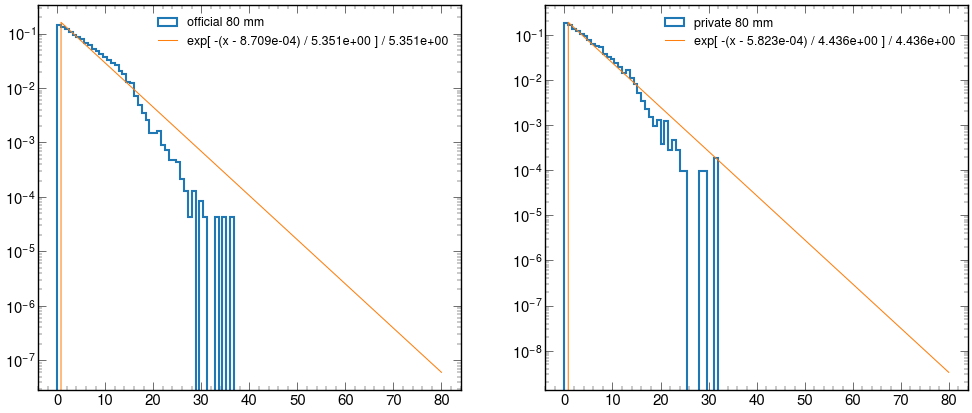

In [66]:
masked_gen1 = events_new["4mu_500GeV_5GeV_80p0mm"].gen[(abs(events_new["4mu_500GeV_5GeV_80p0mm"].gen.pid) == 32) & (abs(events_new["4mu_500GeV_5GeV_80p0mm"].gen.daupid) == 13)]
masked_gen2 = events_old["4mu_500GeV_5GeV_80p0mm"].gen[(abs(events_old["4mu_500GeV_5GeV_80p0mm"].gen.pid) == 32) & (abs(events_old["4mu_500GeV_5GeV_80p0mm"].gen.daupid) == 13)]

masked_gen1_vec = vector.zip({
        "px": masked_gen1.x,
        "py": masked_gen1.y,
        "pz": masked_gen1.z,
        "e": masked_gen1.t})

masked_gen2_vec = vector.zip({
        "px": masked_gen2.x,
        "py": masked_gen2.y,
        "pz": masked_gen2.z,
        "e": masked_gen2.t})

rho1 = ak.flatten((masked_gen1.dauvtx - masked_gen1.vtx).rho)
gamma1 = ak.flatten(masked_gen1_vec.gamma)
beta1 = ak.flatten(masked_gen1_vec.beta)

rho2 = ak.flatten((masked_gen2.dauvtx - masked_gen2.vtx).rho)
gamma2 = ak.flatten(masked_gen2_vec.gamma)
beta2 = ak.flatten(masked_gen2_vec.beta)

plt.style.use(hep.style.CMS)

fig, ax = plt.subplots(1, 2, figsize=(24,10))

plt_range = (0,80)

P1 = stats.expon.fit(rho1/(gamma1 * beta1))
P2 = stats.expon.fit(rho2/(gamma2 * beta2))

ax[0].hist(rho1/(gamma1 * beta1), range=plt_range, linewidth=3, bins=100, histtype='step', label="official 80 mm", density=True)
ax[0].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P1), label=fr"exp[ -(x - {P1[0]:.3e}) / {P1[1]:.3e} ] / {P1[1]:.3e}")
ax[0].set_yscale("log")
ax[0].legend(fontsize=18)

ax[1].hist(rho2/(gamma2 * beta2), range=plt_range, linewidth=3, bins=100, histtype='step', label="private 80 mm", density=True)
ax[1].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P2), label=fr"exp[ -(x - {P2[0]:.3e}) / {P2[1]:.3e} ] / {P2[1]:.3e}")
ax[1].set_yscale("log")
ax[1].legend(fontsize=18)